In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [2]:
# Reading data
df = pd.read_csv("data/banking_data.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print("Shape of the data is:", df.shape)

Shape of the data is: (10000, 14)


In [4]:
# Now we can see there are some useless columns, which won't help in predicting attrition
df1 = df.drop(["RowNumber", "Surname"], axis=1) # default is axis = 0 which is for rows and for columns axis is = 1

In [5]:
df1.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Exploratory Data Analysis:

In [6]:
# Check datatypes
df1.dtypes

CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
# Check if any null values are there
df1.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

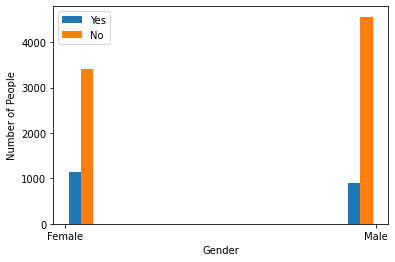

In [8]:
exited = df1[df1.Exited == 1].Gender
not_exited = df1[df1.Exited == 0].Gender

plt.hist([exited, not_exited], label=("Yes","No"))
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.legend()

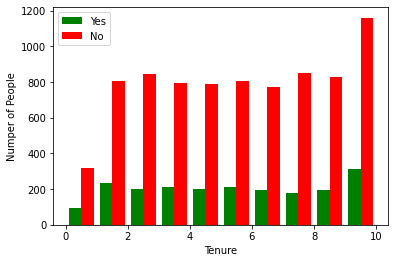

In [9]:
tenure_yes = df1[df1.Exited==1].Tenure
tenure_no = df1[df1.Exited==0].Tenure

plt.hist([tenure_yes, tenure_no], label=("Yes","No"), color=["green", "red"])
plt.xlabel("Tenure")
plt.ylabel("Numper of People")
plt.legend()

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

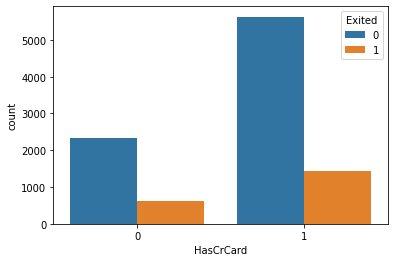

In [10]:
# We can also use Seaborn for displaying count plot
sns.countplot(x=df1.HasCrCard, hue=df1.Exited)

# We can see customers which have credit card contribute more to attrition

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

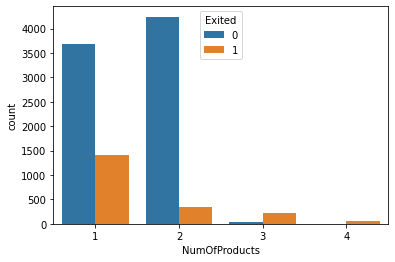

In [11]:
sns.countplot(x=df1.NumOfProducts, hue=df1.Exited)

# Customers with less no. of bank products attrite more compared to customer with more than 2 products

### Feature Pre-processing:

In [12]:
# Now checking all the columns
for column in df1:
    # If we want to get all object type of column i.e. categorical columns
    if df1[column].dtypes == 'object':
        print(f"{column}: {df1[column].unique()}")

# We can see, we have 2 categorical columns

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [13]:
# We can easily use one hot encoding or label encoding to convert these categorical features to numerical features
# We will use one hot encoding
categ_data = ["Geography", "Gender"]
df2 = pd.get_dummies(data=df1, columns=categ_data)
df2.sample(5) # Get random 5 rows

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6731,15643826,503,32,4,0.00,2,1,1,153036.97,0,1,0,0,0,1
5866,15600392,735,53,8,123845.36,2,0,1,170454.93,1,1,0,0,1,0
1355,15615029,734,39,6,0.00,1,1,1,95135.27,0,0,0,1,0,1
6270,15702806,696,24,9,0.00,1,0,0,10883.52,0,0,0,1,0,1
3275,15800215,658,25,3,0.00,2,0,1,173948.40,0,1,0,0,0,1


In [14]:
# In deep learning scaling step is important, because optimizers like gradient descent, adam optimizer, etc are used
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

scaler = MinMaxScaler() # Convert value between 0 to 1
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2.sample(5)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
596,15697183,0.670,0.337838,0.9,0.000000,2,1,0,0.539050,0,0,0,1,0,1
7952,15622305,0.792,0.202703,0.2,0.429928,2,1,1,0.730974,0,0,1,0,1,0
6748,15637646,0.812,0.175676,1.0,0.488833,1,0,0,0.308306,0,1,0,0,0,1
2299,15763171,0.600,0.094595,0.2,0.455687,1,1,1,0.126580,0,0,1,0,1,0
401,15747795,0.486,0.270270,0.4,0.516144,1,1,1,0.770372,0,0,1,0,1,0


In [15]:
# Taking independent and dependent variables
X = df2.drop(["CustomerId", "Exited"], axis=1)
y = df2["Exited"]

In [16]:
# Splitting the dataset into testing and training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X train: ", X_train.shape)
print("Shape of X test: ", X_test.shape)

Shape of X train:  (8000, 13)
Shape of X test:  (2000, 13)


### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(C=2).fit(X_train, y_train)
pred = log_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



### Decison Trees:

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error

dt_clf = DecisionTreeClassifier(max_depth=5, max_features='sqrt') # max_features: The number of features to consider when looking for the best split; If "sqrt", then `max_features=sqrt(n_features)`.
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print(classification_report(y_test, pred))
# To plot the tree
# fig, ax = plt.subplots(figsize=(20, 20))
# tree.plot_tree(dt_clf.fit(X_train, y_train), ax=ax, filled=True)

              precision    recall  f1-score   support

           0       0.87      0.95      0.90      1607
           1       0.65      0.40      0.50       393

    accuracy                           0.84      2000
   macro avg       0.76      0.67      0.70      2000
weighted avg       0.82      0.84      0.82      2000



### Support Vector Classifier

In [19]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) # If we want to do muliple things we can use this
svc_clf = SVC(gamma='auto')
svc_clf.fit(X_train, y_train)
pred = svc_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1607
           1       0.78      0.14      0.23       393

    accuracy                           0.82      2000
   macro avg       0.80      0.56      0.57      2000
weighted avg       0.82      0.82      0.77      2000



### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1800, min_samples_split=2, 
                             min_samples_leaf=1, max_features='auto', 
                             max_depth=10, bootstrap=True)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.44      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



In [21]:
len(X_train.columns)

13

### Neural Networks:

In [22]:
import tensorflow as tf
from tensorflow import keras

ann_model = keras.Sequential([ # The sequential API allows you to create models layer-by-layer for most problems.
    # Create 1st hidden layer
    keras.layers.Dense(70, input_shape=(13,), activation='relu'), # Let's say we want to have 100 neurons in it
    # 2nd hidden layer
    keras.layers.Dense(50, activation='relu'), # We don't need input shape in 2nd hidden layer, it already knows
    # 3rd hidden layer
    keras.layers.Dense(30, activation='relu'), # We don't need input shape in 2nd hidden layer, it already knows
    # 4th hidden layer
    keras.layers.Dense(15,activation="relu"),
    # Output layer
    keras.layers.Dense(1, activation='sigmoid'),
])

In [23]:
# Now to model compile
# Remember: Compile defines the loss function, the optimizer and the metrics. That's all. It has nothing to do with the weights and you can compile a model as many times as you want without causing any problem to pretrained weights. You need a compiled model to train (because training uses the loss function and the optimizer)
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

In [24]:
ann_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4793 - recall: 0.0529
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4126 - recall: 0.2768
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3737 - recall: 0.4002
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3628 - recall: 0.4282
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3556 - recall: 0.4343
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3455 - recall: 0.4538
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3407 - recall: 0.4635
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3400 - recall: 0.4641
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3357 - recall: 0.4745
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3338 - recall: 0.4799
Epoch 11/

250/250 [==============================] - 0s 2ms/step - loss: 0.2542 - recall: 0.6150
Epoch 84/100
250/250 [==============================] - 0s 2ms/step - loss: 0.2503 - recall: 0.6137
Epoch 85/100
250/250 [==============================] - 0s 2ms/step - loss: 0.2511 - recall: 0.6174
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2466 - recall: 0.6259
Epoch 87/100
250/250 [==============================] - 0s 2ms/step - loss: 0.2464 - recall: 0.6314
Epoch 88/100
250/250 [==============================] - 0s 2ms/step - loss: 0.2474 - recall: 0.6204
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2436 - recall: 0.6217
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2409 - recall: 0.6326
Epoch 91/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2419 - recall: 0.6326
Epoch 92/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2411 - recall: 0.6423
Epoch 93/100


In [25]:
# Model is is giving around 41% recall here for y_test
ann_model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4606 - recall: 0.5700


[0.4605952799320221, 0.5699745416641235]

In [26]:
# Let's do some prediction
pred = ann_model.predict(X_test)
pred[:5] # It returns 2D array

array([[0.0188697 ],
       [0.00295544],
       [0.03528351],
       [0.00409019],
       [0.3272677 ]], dtype=float32)

In [27]:
# So we need to flatten it into 1D array as y_test in 1D 
# Also we need to convert all the values in pred to 0 or 1 using 0.5 as threshold
prediction_binary = []

for p in pred:
    if p > 0.5:
        prediction_binary.append(1)
    else:
        prediction_binary.append(0)

prediction_binary[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

In [28]:
y_test[:10]

6252    0
4684    0
1731    0
4742    0
4521    0
6340    0
576     0
5202    1
6363    0
439     0
Name: Exited, dtype: int64

In [29]:
# Print classifcation report
print(classification_report(y_test, prediction_binary))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.59      0.57      0.58       393

    accuracy                           0.84      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.84      0.84      0.84      2000



Text(69.0, 0.5, 'Actual')

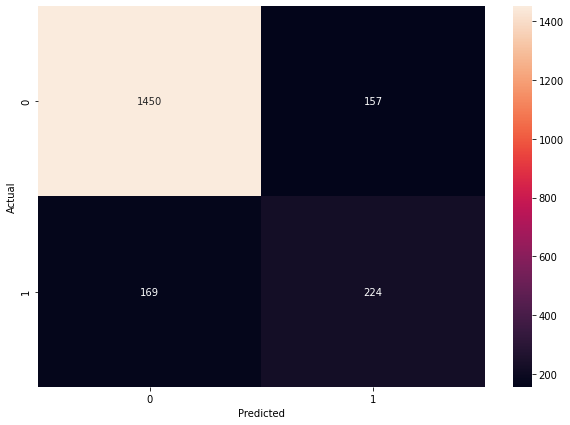

In [30]:
# Confusion Matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=prediction_binary)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### We saw above that when we are using ANN deep learning model, it is giving us better recall than machine learning models

In [47]:
# To have the prediction output with the input dataframe(this is for test data)

# Getting the input DF fo testing data
df_out = X_test.reset_index()
# Actual column will contain the original label
df_out["Actual"] = y_test.reset_index()["Exited"]
# Converting prediction output to DF
y_hats  = pd.DataFrame(prediction_binary)

# Prediction column will contain output of the model
df_out["Prediction"] = y_hats.reset_index()[0]
df_out

,index,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Actual,Prediction
0,6252,0.492,0.189189,0.3,0.385452,2,0,0,0.208904,0,1,0,0,1,0,0
1,4684,0.546,0.337838,0.1,0.000000,2,1,1,0.731908,1,0,0,0,1,0,0
2,1731,0.502,0.351351,0.4,0.000000,2,1,0,0.292777,0,0,1,1,0,0,0
3,4742,0.312,0.554054,0.8,0.474902,2,1,1,0.853422,0,1,0,0,1,0,0
4,4521,0.420,0.121622,0.7,0.498194,1,1,1,0.573346,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6412,0.504,0.472973,0.5,0.391668,1,0,1,0.225155,0,1,0,1,0,1,1
1996,8285,0.518,0.094595,1.0,0.000000,1,0,1,0.549470,1,0,0,0,1,0,0
1997,7853,0.760,0.391892,0.7,0.000000,1,1,0,0.166824,1,0,0,1,0,1,1
1998,1095,0.684,0.148649,0.4,0.000000,1,1,0,0.383759,1,0,0,0,1,1,0


### Preparing sample data which we will be using on front end which a user can see on front end

In [48]:
df_out.loc[df_out['Gender_Female'] == 0, 'Gender'] = 'Male' 
df_out.loc[df_out['Gender_Female'] == 1, 'Gender'] = 'Female' 

In [49]:
# Drop columns which will not be displayed on flask app
df_out.drop(["Geography_France", "Geography_Germany", "Geography_Spain", "Actual", "Prediction", "Gender_Female", "Gender_Male", 'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'], axis=1, inplace=True)

In [50]:
df_out = df_out.set_index('index')
df_out

,NumOfProducts,HasCrCard,IsActiveMember,Gender
index,,,,
6252,2,0,0,Male
4684,2,1,1,Male
1731,2,1,0,Female
4742,2,1,1,Male
4521,1,1,1,Female
...,...,...,...,...
6412,1,0,1,Female
8285,1,0,1,Male
7853,1,1,0,Female


In [51]:
# Now we also need Surname column which was in original df
df_orig = df[['CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']]
df_orig.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,15634602,Hargrave,619,42,2,0.00,101348.88
1,15647311,Hill,608,41,1,83807.86,112542.58
2,15619304,Onio,502,42,8,159660.80,113931.57
3,15701354,Boni,699,39,1,0.00,93826.63
4,15737888,Mitchell,850,43,2,125510.82,79084.10


In [52]:
# Joining the dataframes on index
final_out = pd.merge(df_out, df_orig, left_index=True, right_index=True)
final_out.sample(10)

,NumOfProducts,HasCrCard,IsActiveMember,Gender,CustomerId,Surname,CreditScore,Age,Tenure,Balance,EstimatedSalary
5379,1,1,1,Female,15730796,Barker,627,21,7,98993.02,169156.64
1156,2,1,1,Male,15741295,Yefimova,615,49,3,0.00,49872.33
510,2,1,1,Female,15568506,Forbes,524,31,10,67238.98,161811.23
3574,1,1,1,Female,15683375,Compton,541,32,4,0.00,114951.42
1915,1,0,1,Male,15769051,Shaw,503,25,7,0.00,192841.13
5190,2,1,0,Male,15579548,Nicholson,735,36,5,0.00,105152.17
5938,1,0,1,Male,15679668,Yao,850,38,7,115378.94,162087.82
9340,2,1,0,Male,15605804,Watson,737,45,10,0.00,1364.54
9569,2,1,0,Female,15643523,Power,710,30,10,0.00,19500.10
5802,2,1,0,Male,15716236,Milani,499,35,10,0.00,10722.54


In [53]:
final_out[final_out.index==8799]

,NumOfProducts,HasCrCard,IsActiveMember,Gender,CustomerId,Surname,CreditScore,Age,Tenure,Balance,EstimatedSalary
8799,2,1,0,Male,15803801,Jamieson,454,34,4,0.0,198817.72


In [54]:
df[df.index==8799]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8799,8800,15803801,Jamieson,454,France,Male,34,4,0.0,2,1,0,198817.72,0


In [55]:
# Saving the results
final_out.to_csv("data/output.csv")

In [40]:
ann_model.save("ann_model.h5")
print("Saved model to disk")

Saved model to disk
